# Optimizer

신경망 학습의 목적: 손실 함수의 값을 가능한 낮추는(최적값) 매개변수(가중치, 편향)을 찾는 것

## Gradient Descent

: 목적함수 $f$의 최솟값을 찾는 알고리즘

$x_{n+1} := x_n - \alpha \cdot \nabla f(x_n)$
    
- 초기값 $x_0$와 learning rate $\alpha$ 설정

- local optima, $f'$ = 0 정지 문제가 있다.

In [1]:
# 방정식 2*x = 10 을 만족하는 x 찾기
# x 초깃값 = 0
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.executing_eagerly()
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


x_0 = 0.0
x_1 = 2.0
x_2 = 3.2
x_3 = 3.92
x_4 = 4.352
x_5 = 4.6112003
x_6 = 4.7667203
x_7 = 4.860032
x_8 = 4.9160194
x_9 = 4.9496117


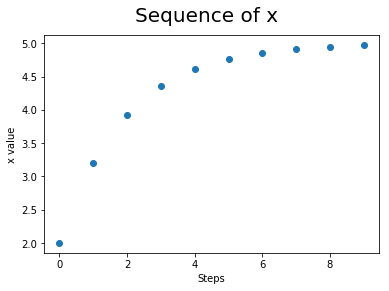

In [2]:
X = tf.Variable(0.)
Y = tf.constant(10.)
H = 2 * X

loss = tf.square(H-Y)
optimize = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(10):
    print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))
sess.close()

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
plt.plot(sequence, "o")

## Momentum
: Gradient Descent 보다 개선된 algorithm, 이동값에 **관성**으로 인한 업데이트가 추가된 optimizer (gradient descent + momentum term) 

$a_{n+1} := \beta \cdot a_n + \nabla f(x_n), a_0 := 0$

$x_{n+1} := x_n - \alpha \cdot a_{n+1}$

- $\beta$ = 0 경우, Gradient Descent와 같다.


- 미분계수가 0이라도 업데이트 된다.

## NAG (Nesterov Accelerated Gradient)
: Momentum에서 개선된 알고리즘, Momentum과의 차이는 gradient를 $x_n$에서 계산하는게 아니라 관성에 의해 이동된 $x_n + \beta \cdot a_n$에서 계산

$a_{n+1} := \beta \cdot a_n + \nabla f(x_n - \beta \cdot a_n), a_0 := 0$

$x_{n+1} := x_n - \alpha \cdot a_{n+1}$

- $\beta$ = 0 경우, Gradient Descent와 같다.


- 최적값을 지나칠 수 있는 문제를 방지할 수 있다.

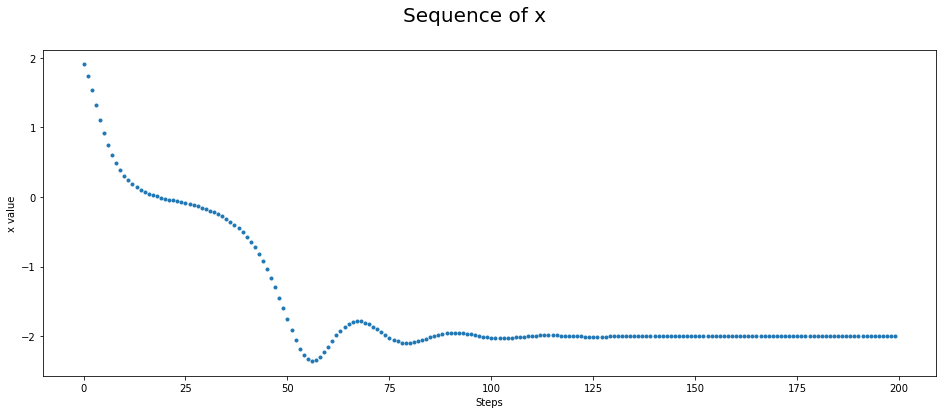

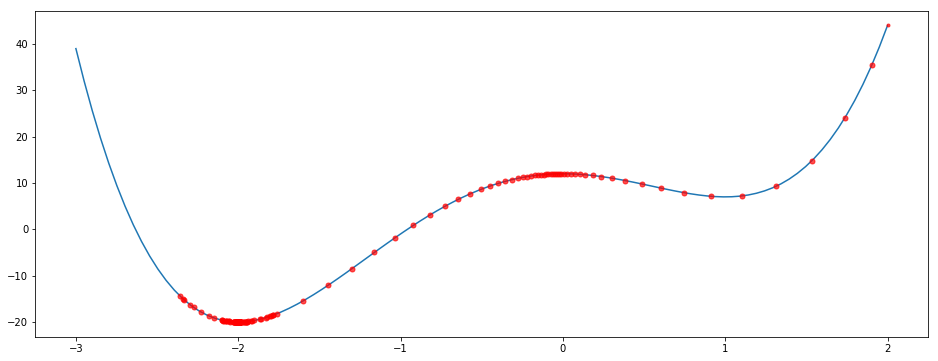

In [9]:
X = tf.Variable(2.)

loss = 3*X**4 + 4*X**3 - 12*X**2 +12
# optimize = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
optimize = tf.train.MomentumOptimizer(0.001, 0.89).minimize(loss)
# optimize = tf.train.MomentumOptimizer(0.001, 0.89, use_nesterov=True).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(200):
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.figure(figsize=(16,6))
plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
_ = plt.plot(sequence, ".")

x = np.linspace(-3,2,100)

def f_2(x):
    X = np.array(x)
    y = 3* X**4 + 4*X**3 - 12*X**2 +12
    return y


plt.figure(figsize=(16,6))
plt.plot(x,f_2(x))

plt.plot(2,f_2(2), "r.", alpha=0.7)
plt.plot(sequence,f_2(sequence), "ro", markersize = 5, alpha=0.7)

## AdaGrad (Adaptive Gradient)
: 학습에서 learning rate의 값은 중요, 너무 크면 발산, 너무 작으면 시간이 오래 걸림
이전 단계의 변화량을 고려(이전 단계의 변화량이 큰 변수들은 update를 작게, 변화량이 큰 변수들은 update 크게한다. 즉, 변화량이 컸던 변수들은 최적점에 도달했을 것이라고 생각하여 update를 작게 하고 작게 했던 변수들은 최솟값에 도달하기 위해 더 큰 값으로 update한다.)

$a_{n+1} := a_n + \nabla f(x_n) \odot \nabla f(x_n), a_0 := 0$

$x_{n+1} := x_n - \frac{\alpha}{\sqrt{a_{n+1} +\epsilon}} \odot \nabla f(x_n)$

- $\epsilon$에 0.01과 같은 작은 값 대입 (분모가 0이 되는 것을 방지)


- 기존에 학습률은 일관적으로 조정되었지만, AdaGrad를 사용하면 학습률을 매개변수의 원소마다 다르게 적용


- 초기 update 속도 느리고, 학습을 진행하며 $a_n$들이 계속 증가하여 update 하는 양이 지나치게 작아져 제대로 update가 되지 않는 문제

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
x_0 = 0.0
x_1 = 0.049999844
x_2 = 0.08517702
x_3 = 0.11381006
x_4 = 0.13854806
x_5 = 0.16063036
x_6 = 0.18075348
x_7 = 0.19935457
x_8 = 0.21672918
x_9 = 0.2330881


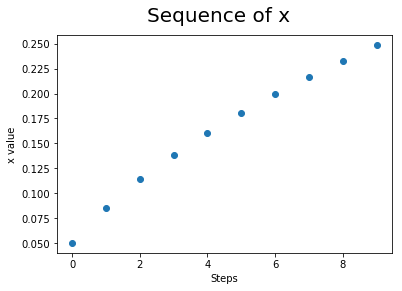

In [18]:
# 방정식 2*x = 10 을 만족하는 x 찾기
# x 초깃값 = 0

X = tf.Variable(0.)
Y = tf.constant(10.)
H = 2 * X

# learning rate = 0.05, epsilon = 0.01
loss = tf.square(H-Y)
optimize = tf.train.AdagradOptimizer(0.05, initial_accumulator_value=0.01).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(10):
    print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
plt.plot(sequence, "o")

## RMSProp 

: AdaGrad가 학습이 진행될수록 update 양이 작아져 update가 제대로 되지 않는 문제를 해결하기 위한 algorithm

**지수이동평균(Exponential Moving Average)** 사용, decay rate($\gamma$)로 정의

$a_{n+1} := \gamma \cdot a_n + (1 - \gamma)\nabla f(x_n) \odot \nabla f(x_n), a_0 := 0$

$x_{n+1} := x_n - \frac{\alpha}{\sqrt{a_{n+1} +\epsilon}} \odot \nabla f(x_n)$

- $\gamma$는 보통 0.9 or 0.999로 설정


- 기존에 학습률은 일관적으로 조정되었지만, AdaGrad를 사용하면 학습률을 매개변수의 원소마다 다르게 적용


- 초기 update 속도 느리고, 학습을 진행하며 $a_n$들이 계속 증가하여 update 하는 양이 지나치게 작아져 제대로 update가 되지 않는 문제

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
x_0 = 0.0
x_1 = 0.15766613
x_2 = 0.27046007
x_3 = 0.36405477
x_4 = 0.4465528
x_5 = 0.52170193
x_6 = 0.591586
x_7 = 0.6574993
x_8 = 0.7203077
x_9 = 0.7806221


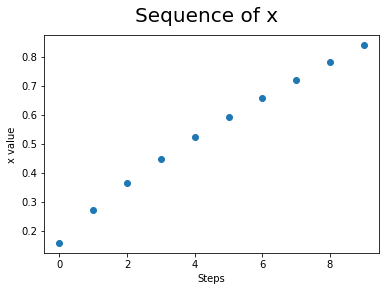

In [19]:
X = tf.Variable(0.)
Y = tf.constant(10.)
H = 2 * X

# learning rate = 0.05, decay = 0.9, epsilon = 0.01
loss = tf.square(H-Y)
optimize = tf.train.RMSPropOptimizer(0.05, decay=0.9, epsilon=0.01).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(10):
    print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
plt.plot(sequence, "o")

## Adam (Adaptive Moment estimation)

: Momentum + RMSProp

- $\beta_1$: momentum decay rate (default: 0.9)
- $\beta_2$: adaptive decay rate (default: 0.09)


- momentum term ($a_{n+1}$)

$$ a_{n+1} := \beta_1 \cdot a_n + (1- \beta_1) \cdot \nabla f(x_n),\  a_n: = 0$$

- adaptive term ($b_{n+1}$)

$$ b_{n+1} := \beta_2 \cdot b_n + (1- \beta_2) \cdot \nabla f(x_n) \odot \nabla f(x_n),\  b_n := 0$$

학습 속도를 보정(올리기) 위해 상수 $\hat{a_{n+1}}$ 사용


$$\hat{a_{n+1}} := \alpha \cdot \frac{\sqrt{1 - (\beta_2)^{n+1}}}{1 - (\beta_1)^{n+1}}$$



$$x_{n+1} := x_n - \frac{\hat{a_{n+1}}}{\sqrt{b_{n+1}} +\epsilon} \odot \nabla a_{n+1}$$

- $\epsilon$는 보통 1e-8 ($10^{-8}$) 대입


- 기존에 학습률은 일관적으로 조정되었지만, AdaGrad를 사용하면 학습률을 매개변수의 원소마다 다르게 적용


- 초기 update 속도 느리고, 학습을 진행하며 $a_n$들이 계속 증가하여 update 하는 양이 지나치게 작아져 제대로 update가 되지 않는 문제

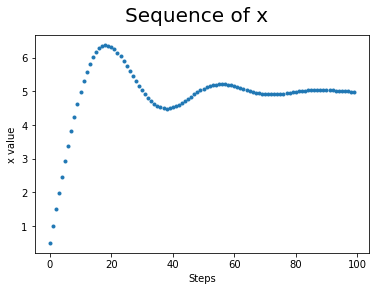

In [20]:
X = tf.Variable(0.)
Y = tf.constant(10.)
H = 2 * X

# learning rate = 0.5
loss = tf.square(H-Y)
optimize = tf.train.AdamOptimizer(0.5).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(100):
    #print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
plt.plot(sequence, ".")

x_0 = 0.0
x_1 = 20.0
x_2 = -40.0
x_3 = 140.0
x_4 = -400.0
x_5 = 1220.0
x_6 = -3640.0
x_7 = 10940.0
x_8 = -32800.0
x_9 = 98420.0


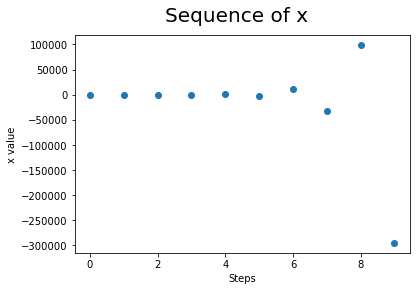

In [23]:
X = tf.Variable(0.)
Y = tf.constant(10.)
H = 2 * X

loss = tf.square(H-Y)
optimize = tf.train.GradientDescentOptimizer(0.5).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(10):
    print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))
sess.close()

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
plt.plot(sequence, "o")